In [ ]:
import keras
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import spacy
import string
import re

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
 nltk.download('stopwords')
 nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset=read_csv("/content/drive/MyDrive/Thesis Data/Deprassion_Detection_Data_Set_M.csv",encoding='latin')
dataset.head()

,Text,class
0,Not everything is made of giggles and sunshine...,Sad
1,Happiness and sadness are two sides of the sam...,Sad
2,Nobody knows about the emotional breakdowns I ...,Sad
3,Just because I can carry my troubles well does...,Sad
4,Getting flashbacks suck when they??re memorie...,Sad


In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset.shape

(5685, 2)

In [ ]:
# Print the value counts of the Label column
print(dataset["class"].value_counts())

Angry      1691
Anxiety    1435
Sad        1124
Happy      1005
Name: class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


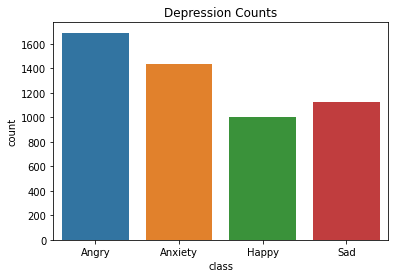

In [ ]:
# Change the datatype as "category"
dataset["class"] = dataset["class"].astype("category")# Visualize the Label counts
sns.countplot(dataset["class"])
plt.title("Depression Counts")
plt.savefig("sentiment411")
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stemmer=nltk.SnowballStemmer('english')
STOPWORDS=stopwords.words('english')
PUNCT_TO_REMOVE = string.punctuation

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
dataset['Text'] = dataset['Text'].apply(remove_emoji)

In [ ]:
def clean_text(text):
    
    text = word_tokenize(text)                                                     # tokenize
    text = str(text).lower()                                                       # converting to lower case
    text = re.sub(r'@\S+|http\S+|www.\S+|\n','',text)                              # removing mentions and links
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)                                    # removing special characters 
    text = [stemmer.stem(word) for word in text.split(' ')]                        # stem words 
    text = " ".join([word for word in text if word not in STOPWORDS])              # remove stopwords
    text = text.strip()                                                            # remove extra spaces from start and end of string
    text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))                  # remove puncuation
     
    return text

dataset['clean_data'] = dataset['Text'].apply(clean_text)


In [ ]:
dataset.head(10)

,Text,class,clean_data
0,Not everything is made of giggles and sunshine...,Sad,everyth made giggl sunshin everi frown raind...
1,Happiness and sadness are two sides of the sam...,Sad,happi sad two side coin whi itx9f realli un...
2,Nobody knows about the emotional breakdowns I ...,Sad,nobodi know emot breakdown experi ix9f alon ...
3,Just because I can carry my troubles well does...,Sad,becaus carri troubl well doesnx9f mean donx9...
4,Getting flashbacks suck when they??re memorie...,Sad,get flashback suck theyx9f memori youx9f a...
5,"Pain is hard to avoid. Actually, just the act ...",Sad,pain hard avoid actual act tri avoid alreadi...
6,Remember that pessimism isn??t really bad at ...,Sad,rememb pessim isnx9f realli bad peopl disap...
7,"####Whenever happiness visits me, bad things h...",Sad,whenev happi visit bad thing happen right ix...
8,Wouldn??t it be terrific if we could turn bac...,Sad,wouldnx9f terrif could turn back time could...
9,"All human souls are connected, which explains ...",Sad,human soul connect explain whi hurt much detach


In [ ]:
# Get the tweet lengths
dataset["length"] = dataset["clean_data"].str.len()# Get the number of words in tweets
dataset["words"] = dataset["clean_data"].str.split().str.len()# Display the new columns
display(dataset[["length", "words"]])

,length,words
0,58,9
1,80,13
2,81,13
3,67,10
4,62,9
...,...,...
5679,69,13
5680,84,15
5681,165,29
5682,111,20


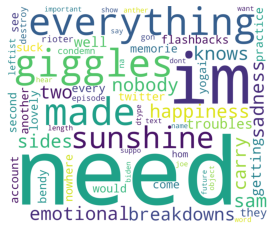

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def preprocessing(data):
        # convert all words to lowercase
        data = str(data).lower()
        # load the stop_words of english
        stop_words = set(stopwords.words('english'))
        # concatenate all the data with spaces.
        paragraph = data.strip()
        # tokenize the paragraph using the inbuilt tokenizer
        word_tokens = word_tokenize(paragraph) 
        # filter words present in stopwords list 
        preprocessed_data = ' '.join([word for word in word_tokens if not word in stop_words])
        return preprocessed_data

        
def create_word_cloud(final_data):
        wordcloud = WordCloud(stopwords=preprocessing(final_data), background_color="white", width=3000,height=2500).generate(preprocessing(final_data) )
        # plt the image generated by WordCloud class
        #plt.figure(1,figsize=(13,13))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.savefig("stopword1")
        plt.show()
create_word_cloud(dataset['Text'])

In [ ]:
number = LabelEncoder()
dataset['label'] = number.fit_transform(dataset['class'])

dataset['label']

0       3
1       3
2       3
3       3
4       3
       ..
5680    1
5681    1
5682    1
5683    1
5684    1
Name: label, Length: 5685, dtype: int64

In [ ]:
dataset.head(10)

,Text,class,clean_data,label
0,Not everything is made of giggles and sunshine...,Sad,everyth made giggl sunshin everi frown raind...,3
1,Happiness and sadness are two sides of the sam...,Sad,happi sad two side coin whi itx9f realli un...,3
2,Nobody knows about the emotional breakdowns I ...,Sad,nobodi know emot breakdown experi ix9f alon ...,3
3,Just because I can carry my troubles well does...,Sad,becaus carri troubl well doesnx9f mean donx9...,3
4,Getting flashbacks suck when they??re memorie...,Sad,get flashback suck theyx9f memori youx9f a...,3
5,"Pain is hard to avoid. Actually, just the act ...",Sad,pain hard avoid actual act tri avoid alreadi...,3
6,Remember that pessimism isn??t really bad at ...,Sad,rememb pessim isnx9f realli bad peopl disap...,3
7,"####Whenever happiness visits me, bad things h...",Sad,whenev happi visit bad thing happen right ix...,3
8,Wouldn??t it be terrific if we could turn bac...,Sad,wouldnx9f terrif could turn back time could...,3
9,"All human souls are connected, which explains ...",Sad,human soul connect explain whi hurt much detach,3


In [ ]:
tfidf1 = TfidfVectorizer(ngram_range=(1,1),use_idf=True,tokenizer=lambda x: x.split()) 
X = tfidf1.fit_transform(dataset['clean_data'])
y=dataset['label']
print("Shape of TF-IDF:",X.shape,'\n')

Shape of TF-IDF: (5685, 7504) 



In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot


In [ ]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Class=3, n=1862 (25.000%)
Class=2, n=1862 (25.000%)
Class=0, n=1862 (25.000%)
Class=1, n=1862 (25.000%)


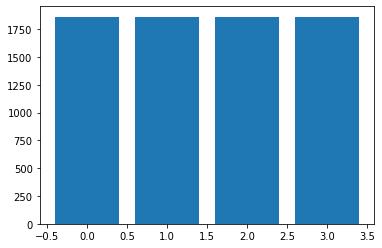

In [ ]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size = 0.8, test_size = 0.2,random_state =0)

print('Shape of X_train:', xtrain.shape)
print('Shape of X_test:', xtest.shape)
print('Shape of Y_train:', ytrain.shape)
print('Shape of Y_test:', ytest.shape)

Shape of X_train: (5958, 7504)
Shape of X_test: (1490, 7504)
Shape of Y_train: (5958,)
Shape of Y_test: (1490,)


SVM

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve



In [ ]:
#SVM

from sklearn.svm import LinearSVC
model_SVM=SVC(probability=True)
model_SVM.fit(xtrain,ytrain)
predicted_SVM = model_SVM.predict(xtest)
s=accuracy_score(ytest,predicted_SVM)
print(s)

0.889261744966443


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_SVM))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       340
           1       0.93      0.91      0.92       347
           2       0.93      0.83      0.88       353
           3       0.94      0.85      0.89       313

    accuracy                           0.88      1353
   macro avg       0.89      0.88      0.88      1353
weighted avg       0.89      0.88      0.88      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a=precision_score(ytest, predicted_SVM,average='micro')
b=recall_score(ytest, predicted_SVM,average='micro')
c=f1_score(ytest, predicted_SVM,average='micro')
print("Precision_score",a)
print("Recall_score",b)
print("F1_score",c)

Precision_score 0.8802660753880266
Recall_score 0.8802660753880266
F1_score 0.8802660753880266


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


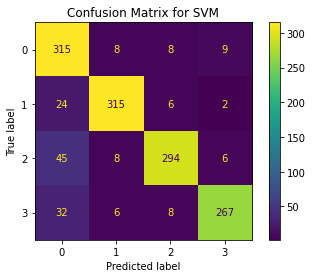

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_SVM,xtest,ytest)
plt.title("Confusion Matrix for SVM")
plt.savefig("CM_SVM")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_SVM_pr = model_SVM.predict_proba(xtest)
auc1 = metrics.roc_auc_score(ytest,predicted_SVM_pr,multi_class="ovo", average="macro" )
auc1

0.9804683062056249

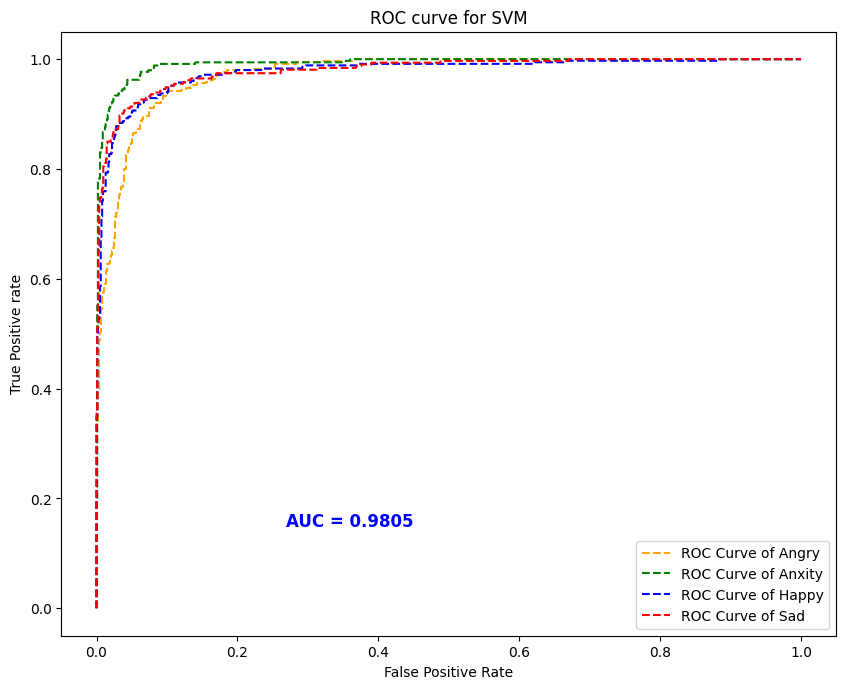

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_SVM_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for SVM')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc1, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_SVM")
plt.legend(loc='best')

Naive bayes

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve



In [ ]:
#naive bayes

model_NB = MultinomialNB()
model_NB.fit(xtrain, ytrain)
predicted_NB = model_NB.predict(xtest)


n=accuracy_score(ytest,predicted_NB)
print("Accuracy",n)

Accuracy 0.8211382113821138


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_NB))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       340
           1       0.89      0.90      0.89       347
           2       0.78      0.88      0.83       353
           3       0.75      0.87      0.81       313

    accuracy                           0.82      1353
   macro avg       0.83      0.82      0.82      1353
weighted avg       0.83      0.82      0.82      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a1=precision_score(ytest, predicted_NB,average='micro')
b1=recall_score(ytest, predicted_NB,average='micro')
c1=f1_score(ytest, predicted_NB,average='micro')
print("Precision_score",a1)
print("Recall_score",b1)
print("F1_score",c1)

Precision_score 0.8211382113821138
Recall_score 0.8211382113821138
F1_score 0.8211382113821138


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


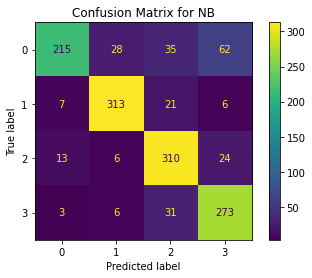

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_NB,xtest,ytest)
plt.title("Confusion Matrix for NB")
plt.savefig("CM_NB")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_NB_pr = model_NB.predict_proba(xtest)
auc2 = metrics.roc_auc_score(ytest,predicted_NB_pr,multi_class="ovo", average="macro" )
auc2

0.9598770244979672

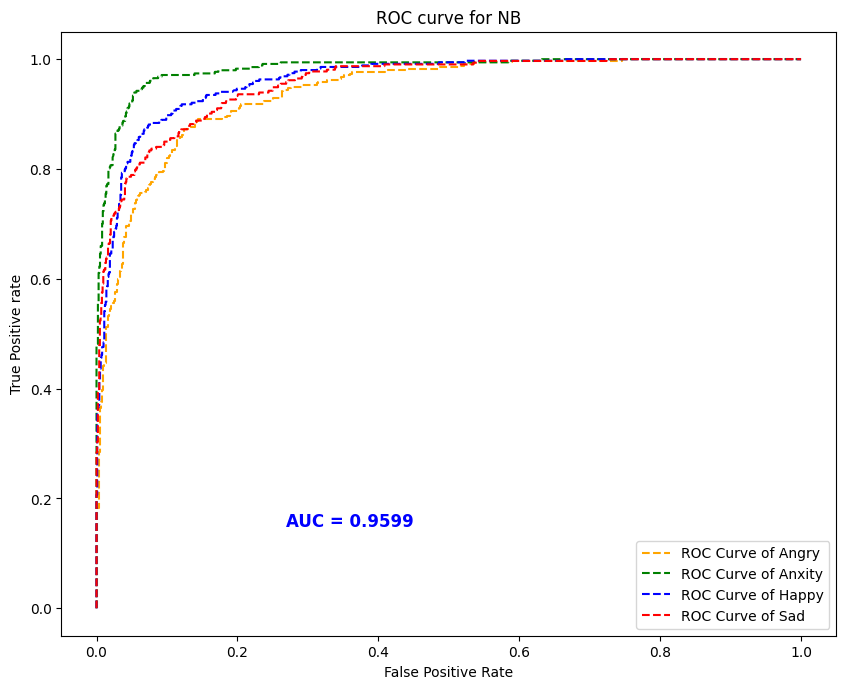

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_NB_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for NB')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc2, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_NB")
plt.legend(loc='best')

Decetion Tree

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve



In [ ]:
#Decision Tree

model_DT= DecisionTreeClassifier()  
model_DT.fit(xtrain,ytrain)
predicted_DT = model_DT.predict(xtest)

dt=accuracy_score(ytest,predicted_DT)
print(dt)

0.7967479674796748


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_DT))

              precision    recall  f1-score   support

           0       0.82      0.66      0.74       340
           1       0.88      0.91      0.89       347
           2       0.82      0.78      0.80       353
           3       0.69      0.83      0.75       313

    accuracy                           0.80      1353
   macro avg       0.80      0.80      0.79      1353
weighted avg       0.80      0.80      0.80      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a2=precision_score(ytest, predicted_DT,average='micro')
b2=recall_score(ytest, predicted_DT,average='micro')
c2=f1_score(ytest, predicted_DT,average='micro')
print("Precision_score",a2)
print("Recall_score",b2)
print("F1_score",c2)

Precision_score 0.7967479674796748
Recall_score 0.7967479674796748
F1_score 0.7967479674796748


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


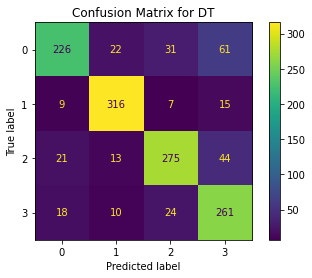

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT,xtest,ytest)
plt.title("Confusion Matrix for DT")
plt.savefig("CM_DT")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_DT_pr = model_DT.predict_proba(xtest)
auc3 = metrics.roc_auc_score(ytest,predicted_DT_pr,multi_class="ovo", average="macro" )
auc3

0.8651222643058992

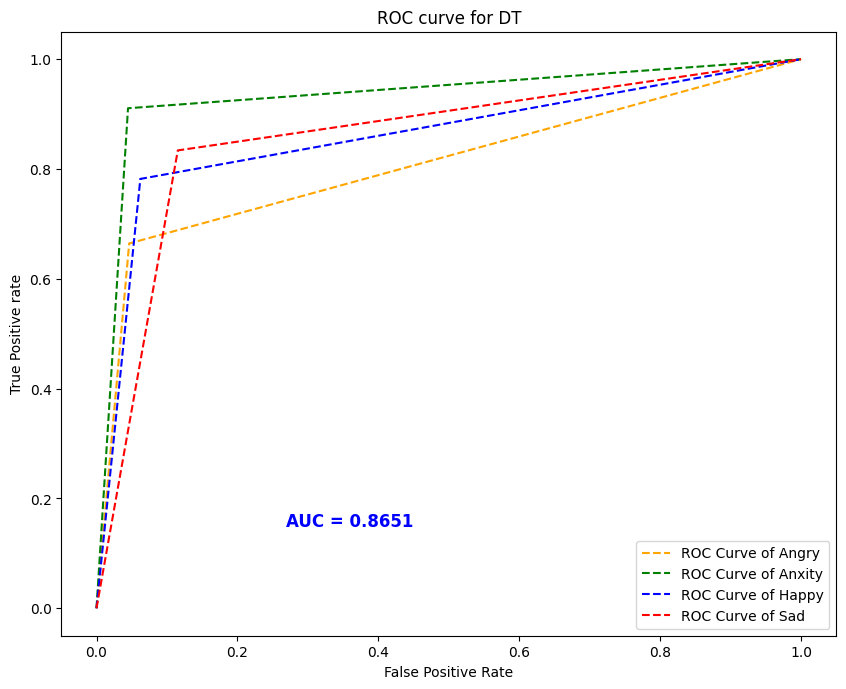

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_DT_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for DT')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc3, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_DT")
plt.legend(loc='best')

Random Forest

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve



In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier  

model_RF=RandomForestClassifier(n_estimators= 25, criterion="entropy")
model_RF.fit(xtrain,ytrain)
predicted_RF = model_RF.predict(xtest)


rm=accuracy_score(ytest,predicted_RF)
print("Accuracy",rm)

Accuracy 0.8366592756836659


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_RF))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78       340
           1       0.91      0.93      0.92       347
           2       0.88      0.82      0.85       353
           3       0.71      0.89      0.79       313

    accuracy                           0.84      1353
   macro avg       0.84      0.84      0.84      1353
weighted avg       0.85      0.84      0.84      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a3=precision_score(ytest, predicted_RF,average='micro')
b3=recall_score(ytest, predicted_RF,average='micro')
c3=f1_score(ytest, predicted_RF,average='micro')
print("Precision_score",a3)
print("Recall_score",b3)
print("F1_score",c3)

Precision_score 0.8366592756836659
Recall_score 0.8366592756836659
F1_score 0.836659275683666


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


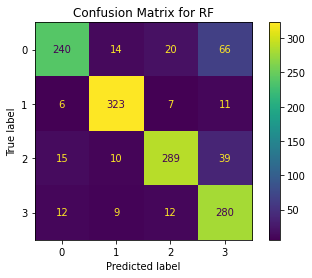

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_RF,xtest,ytest)
plt.title("Confusion Matrix for RF")
plt.savefig("CM_RF")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_RF_pr = model_RF.predict_proba(xtest)
auc4 = metrics.roc_auc_score(ytest,predicted_RF_pr,multi_class="ovo", average="macro" )
auc4

0.9577642284969787

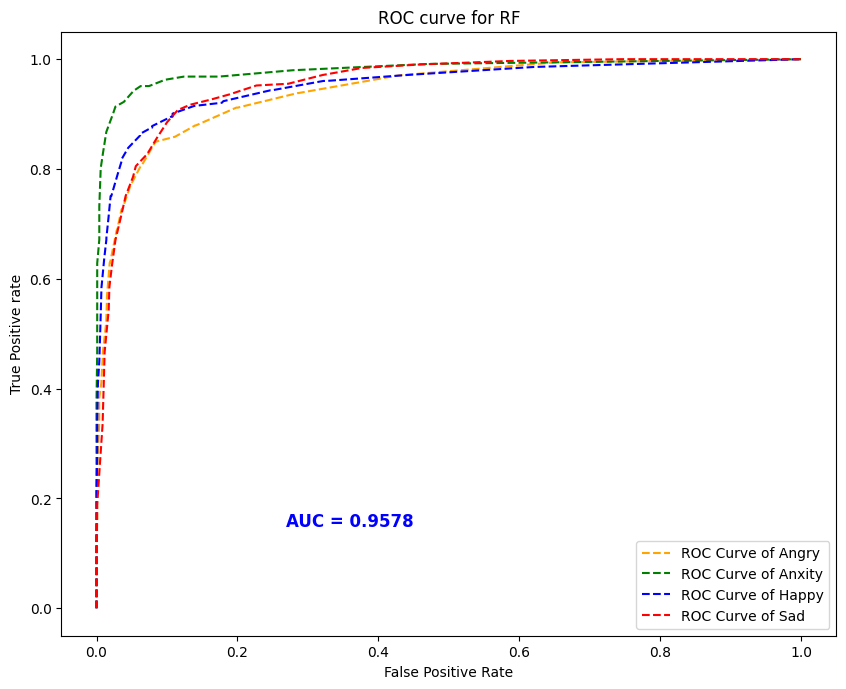

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_RF_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for RF')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc4, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_RF")
plt.legend(loc='best')

Logistic Regression

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve


In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()

model_LR.fit(xtrain,ytrain)
predicted_LR = model_LR.predict(xtest)


lr=accuracy_score(ytest,predicted_LR)
print(lr)

0.8403547671840355


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_LR))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       340
           1       0.92      0.90      0.91       347
           2       0.86      0.80      0.83       353
           3       0.81      0.84      0.82       313

    accuracy                           0.84      1353
   macro avg       0.84      0.84      0.84      1353
weighted avg       0.84      0.84      0.84      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a4=precision_score(ytest, predicted_LR,average='micro')
b4=recall_score(ytest, predicted_LR,average='micro')
c4=f1_score(ytest, predicted_LR,average='micro')
print("Precision_score",a4)
print("Recall_score",b4)
print("F1_score",c4)

Precision_score 0.8403547671840355
Recall_score 0.8403547671840355
F1_score 0.8403547671840355


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


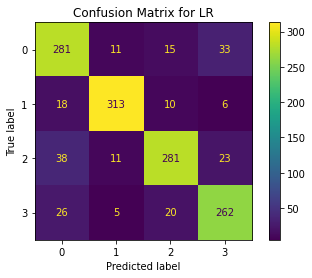

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_LR,xtest,ytest)
plt.title("Confusion Matrix for LR")
plt.savefig("CM_LR")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_LR_pr = model_LR.predict_proba(xtest)
auc5 = metrics.roc_auc_score(ytest,predicted_LR_pr,multi_class="ovo", average="macro" )
auc5

0.9668751126824217

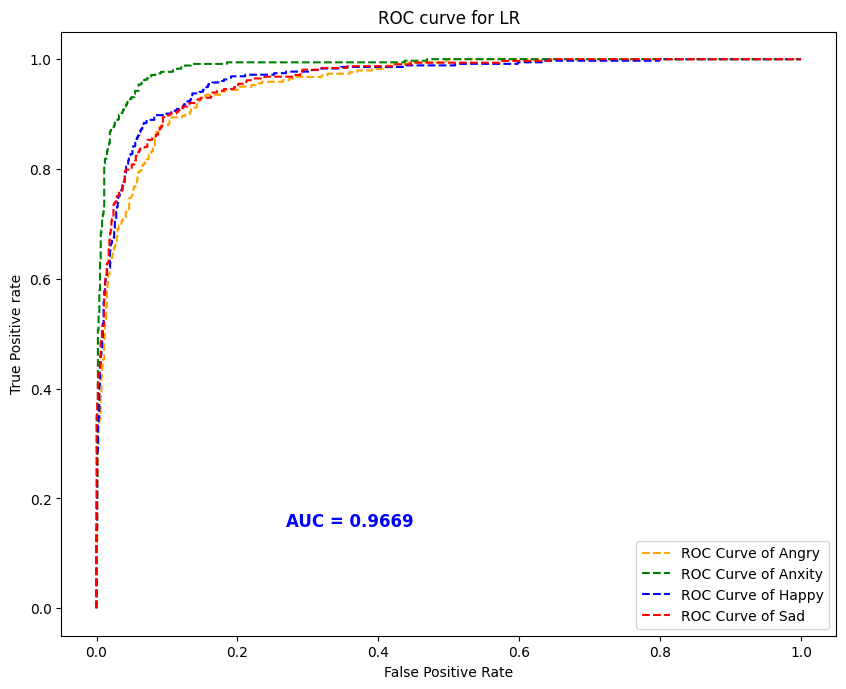

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_LR_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for LR')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc5, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_LR")
plt.legend(loc='best')

KNN

1.   Model Create
2.   Classification Report
3.   Confusion Matrix
4.   Roc Curve


In [ ]:

#KNN

model_KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

model_KNN.fit(xtrain,ytrain)
predicted_KNN = model_KNN.predict(xtest)

knn=accuracy_score(ytest,predicted_KNN)
print(knn)

0.5550628233555063


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predicted_KNN))

              precision    recall  f1-score   support

           0       0.88      0.13      0.22       340
           1       0.94      0.37      0.54       347
           2       0.93      0.78      0.85       353
           3       0.35      0.97      0.51       313

    accuracy                           0.56      1353
   macro avg       0.78      0.56      0.53      1353
weighted avg       0.79      0.56      0.53      1353



In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
a5=precision_score(ytest, predicted_KNN,average='micro')
b5=recall_score(ytest, predicted_KNN,average='micro')
c5=f1_score(ytest, predicted_KNN,average='micro')
print("Precision_score",a5)
print("Recall_score",b5)
print("F1_score",c5)

Precision_score 0.5550628233555063
Recall_score 0.5550628233555063
F1_score 0.5550628233555063


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


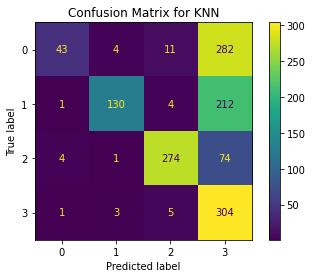

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_KNN,xtest,ytest)
plt.title("Confusion Matrix for KNN")
plt.savefig("CM_KNN")
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
predicted_KNN_pr = model_KNN.predict_proba(xtest)
auc6 = metrics.roc_auc_score(ytest,predicted_KNN_pr,multi_class="ovo", average="macro" )
auc6

0.7080933883471975

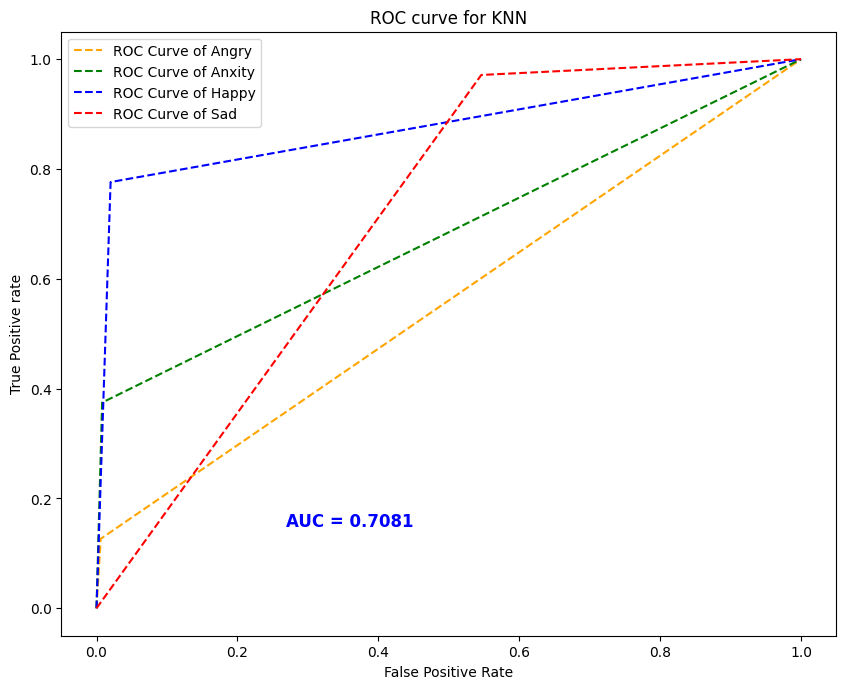

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4
plt.figure(figsize=(10, 8), dpi=100)
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, predicted_KNN_pr[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='ROC Curve of Angry')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='ROC Curve of Anxity')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='ROC Curve of Happy')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='ROC Curve of Sad')
plt.title('ROC curve for KNN')
plt.text(0.45, 0.15, 'AUC = %0.4f' % auc6, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig("ROC_KNN")
plt.legend(loc='best')

ROC CURVE for all MODEL

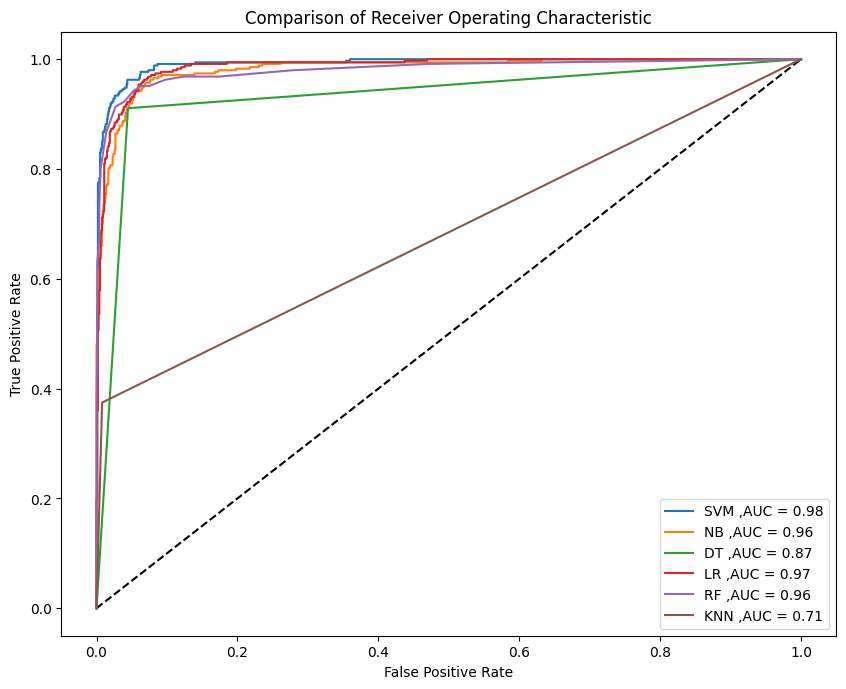

In [ ]:
from sklearn import metrics
#ROC Curve
from sklearn.metrics import roc_curve
predicted_SVM_pr = model_SVM.predict_proba(xtest)[:,1]
fpr1 , tpr1, thresholds1 =metrics.roc_curve(ytest, predicted_SVM_pr,pos_label=1)

predicted_NB_pr = model_NB.predict_proba(xtest)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(ytest, predicted_NB_pr,pos_label=1)

predicted_DT_pr = model_DT.predict_proba(xtest)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(ytest, predicted_DT_pr,pos_label=1)

predicted_LR_pr = model_LR.predict_proba(xtest)[:,1]
fpr4 , tpr4, thresholds4 = metrics.roc_curve(ytest, predicted_LR_pr,pos_label=1)

predicted_RF_pr = model_RF.predict_proba(xtest)[:,1]
fpr5 , tpr5, thresholds5 = metrics.roc_curve(ytest, predicted_RF_pr,pos_label=1)

predicted_KNN_pr = model_KNN.predict_proba(xtest)[:,1]
fpr6 , tpr6, threshold6 = metrics.roc_curve(ytest, predicted_KNN_pr,pos_label=1)

plt.figure(figsize=(10, 8), dpi=100)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "SVM ,"+'AUC = %0.2f' % auc1)
plt.plot(fpr2, tpr2, label= "NB ,"+'AUC = %0.2f' % auc2)
plt.plot(fpr3, tpr3, label= "DT ,"+'AUC = %0.2f' % auc3)
plt.plot(fpr4, tpr4, label= "LR ,"+'AUC = %0.2f' % auc5)
plt.plot(fpr5, tpr5, label= "RF ,"+'AUC = %0.2f' % auc4)
plt.plot(fpr6, tpr6, label= "KNN ,"+'AUC = %0.2f' % auc6)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Comparison of Receiver Operating Characteristic')
plt.savefig('recallttt.png')
plt.show()



**Comparison**

In [ ]:
import pandas as pd
  
# creating and initializing a nested list
datas = [[s, a, b, c, auc1],
            [n, a1, b1, c1, auc2],
            [dt, a2, b2, c2, auc3],
            [rm, a3, b3, c3, auc4],
            [lr, a4, b4, c4, auc5],
            [knn, a5, b5, c5, auc6]]
  
# Create a DataFrame object
df = pd.DataFrame(datas,
                  columns=['Accuracy', 'Precision Score', 'Recall Score', 'F1 Score','AUC Score'],
                  index=['Support Vector Macine','Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN'])

In [ ]:
df

,Accuracy,Precision Score,Recall Score,F1 Score,AUC Score
Support Vector Macine,0.880266,0.880266,0.880266,0.880266,0.980468
Naive Bayes,0.821138,0.821138,0.821138,0.821138,0.959877
Decision Tree,0.796748,0.796748,0.796748,0.796748,0.865122
Random Forest,0.836659,0.836659,0.836659,0.836659,0.957764
Logistic Regression,0.840355,0.840355,0.840355,0.840355,0.966875
KNN,0.555063,0.555063,0.555063,0.555063,0.708093


In [ ]:
def predict(text):
    text=remove_emoji(text)
    text=clean_text(text)
    print(text)

In [ ]:
input="Pain is hard to avoid. Actually, just the act trying to avoid it is already a pain.....???????????________🤐🤐🤐"

In [ ]:
predict(a)